# Support Vector Machine

## SVM can be used as a Logistic regression model for linear datasets and also for non-linear datasets

## SVM for Linear dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('50_Startups.csv')
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [3]:
data.shape

(50, 5)

In [4]:
data.dtypes

R&D Spend          float64
Administration     float64
Marketing Spend    float64
State               object
Profit             float64
dtype: object

In [5]:
data.State.value_counts()   #nominal feature

New York      17
California    17
Florida       16
Name: State, dtype: int64

In [6]:
data.isnull().sum() #checking if there is any null values OR missing values in the dataframe

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [7]:
#nominal feature :implement one hot encoding to convert categorical data into numeric
#                 There is no mathematical order or relationships between values in the categories
#ordinal feature: implement label encoding to convert this ordinal feature into numeric
#                 There is some mathematical order or relationships between categories

In [8]:
#here state is the categorical column in the data dataframe
#so here we need to use One-hot-encoding on nominal categorical column in the dataFrame
data

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


### converting each values in the dataframe from float to integer values

In [9]:
data['R&D Spend'] = data['R&D Spend'].apply(int)
data['Administration'] = data['Administration'].apply(int)
data['Marketing Spend'] = data['Marketing Spend'].apply(int)
data['Profit'] = data['Profit'].apply(int)

In [10]:
data

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349,136897,471784,New York,192261
1,162597,151377,443898,California,191792
2,153441,101145,407934,Florida,191050
3,144372,118671,383199,New York,182901
4,142107,91391,366168,Florida,166187
5,131876,99814,362861,New York,156991
6,134615,147198,127716,California,156122
7,130298,145530,323876,Florida,155752
8,120542,148718,311613,New York,152211
9,123334,108679,304981,California,149759


### One-hot-encoding:nominal categorical column

#### Here we are converting categorical column "column name = state" into integer column and condensing them up

In [11]:
d=pd.get_dummies(data['State'])  #function to create dummy variables

In [12]:
d

,California,Florida,New York
0,0,0,1
1,1,0,0
2,0,1,0
3,0,0,1
4,0,1,0
5,0,0,1
6,1,0,0
7,0,1,0
8,0,0,1
9,1,0,0


In [13]:
### display all numeric cols
#data.iloc[:,:-1].select_dtypes(exclude=['object']) 
# exclude=['object'] integer type columns only will be selected from data (dataFrame)
# here -1 means all the columns will be selected except last column
f=data.iloc[:,:-1].select_dtypes(exclude=['object']) 
f

,R&D Spend,Administration,Marketing Spend
0,165349,136897,471784
1,162597,151377,443898
2,153441,101145,407934
3,144372,118671,383199
4,142107,91391,366168
5,131876,99814,362861
6,134615,147198,127716
7,130298,145530,323876
8,120542,148718,311613
9,123334,108679,304981


### How to concatinate two dataFrames

#### Here we are concatenating f and d dataFrames into one DataFrame

In [14]:
x=pd.concat((f,d),axis=1)
x

,R&D Spend,Administration,Marketing Spend,California,Florida,New York
0,165349,136897,471784,0,0,1
1,162597,151377,443898,1,0,0
2,153441,101145,407934,0,1,0
3,144372,118671,383199,0,0,1
4,142107,91391,366168,0,1,0
5,131876,99814,362861,0,0,1
6,134615,147198,127716,1,0,0
7,130298,145530,323876,0,1,0
8,120542,148718,311613,0,0,1
9,123334,108679,304981,1,0,0


In [15]:
y=data['Profit'].values

### splitting dataset into train and test data

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [17]:
# x_train = input_train
# x_test = input_test
# y_train = output_train
# y_test = output_test
x_train,x_test,y_train,y_test = train_test_split(x.values,y,test_size=15,
                                                 random_state=10)

In [18]:
x_test.shape

(15, 6)

### Import SVM and use SVM For Linear dataset

In [19]:
from sklearn.svm import SVC

### Applying HyperParameter tuning on SVC Machine Learning model -> You can apply this HyperParameter method on any Machine Learning model

In [20]:
from sklearn.model_selection import GridSearchCV

In [21]:
#Hyper perameter tuning 
p = [{'kernel':['linear'],'C':[.01,1,10]},{'kernel':['rbf'],'gamma':[.001,.01,.1,10]}]

In [22]:
svm = GridSearchCV(SVC(), param_grid = p, scoring = 'accuracy')

In [23]:
#svm.fit(x_train,y_train)

In [24]:
# How to apply SVM on Linear data model with decimal values in it
# Cannot solve n_split=5 error here even though I converted all the decimal values into integer ones in the DataFrame

## Example 2

## SVM Model on Linear seperable dataset

In [25]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np

In [26]:
x,y = make_blobs(n_samples=500,n_features=2,centers=2,cluster_std=2.5,random_state=1)

In [27]:
x.shape

(500, 2)

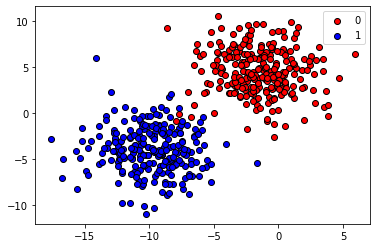

In [28]:
plt.scatter(x[y==0,0],x[y==0,1],c='red',label='0',edgecolors='k')
plt.scatter(x[y==1,0],x[y==1,1],c='blue',label='1',edgecolors='k')
plt.legend()
plt.show()

### Applying SVM model

In [29]:
from sklearn.svm import SVC

In [30]:
#gamma=.01,10
clf = SVC(kernel='rbf',gamma=10)  #model assumes that data is non-linear separable
#clf = SVC(kernel='linear')   #model assumes that data is linear separable

In [31]:
clf.fit(x,y)
score = clf.score(x,y)
score

1.0

In [32]:
pred = clf.predict(x)
np.where(pred!=y)

(array([], dtype=int64),)

### Testing SVM model

In [33]:
test = [-6,0.5]

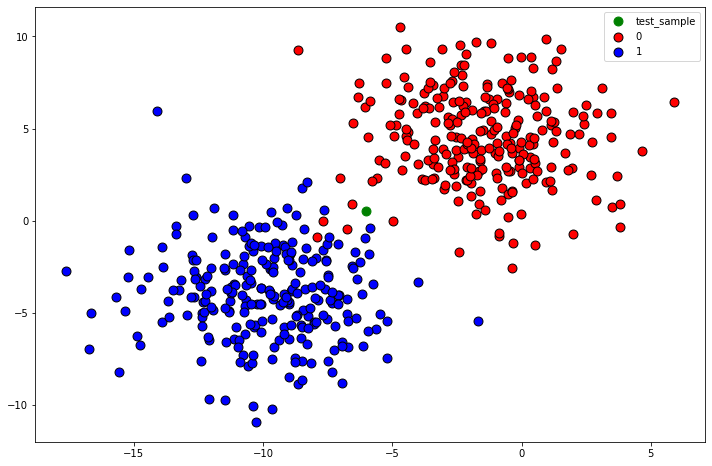

In [34]:
plt.figure(figsize=(12,8))
plt.scatter(test[0],test[1],c='green',label='test_sample',s=80)

plt.scatter(x[y==0,0],x[y==0,1],c='red',label='0',edgecolors='k',s=80)
plt.scatter(x[y==1,0],x[y==1,1],c='blue',label='1',edgecolors='k',s=80)
plt.legend()
plt.show()

In [35]:
clf.predict([test])

array([0])

## SVM model on Non-linear seperable dataset

In [36]:
from sklearn.datasets import make_circles
#to avoid future warning
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [37]:
x1,y1 = make_circles(n_samples=100,random_state=10,noise=.05)

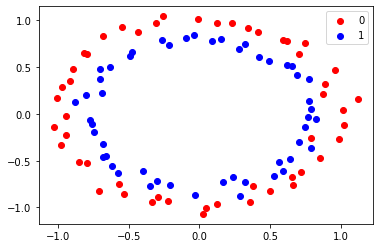

In [38]:
plt.scatter(x1[y1==0,0],x1[y1==0,1],c='red',label='0')
plt.scatter(x1[y1==1,0],x1[y1==1,1],c='blue',label='1')
plt.legend()
plt.show()

In [39]:
# RBF is used to work with non linear dataset

# Gamma is used when we use the RBF kernel. if we use linear kernel then we do not need gamma only we need C hypermeter.

# Gamma is a hyperparameter which we have to set before training model. Gamma decides the the region of a class

# if gamma is low then decision region of a class will be large

# if gamma is high then decision region of a class will be small

In [40]:
clf=SVC(kernel='rbf',gamma=10)

In [41]:
clf.fit(x1,y1)

SVC(gamma=10)

In [42]:
clf.score(x1,y1)

0.97

## When we have large amount of samples and features then how to select kernel value?

## SVM with Hyper parameter tuning

In [43]:
from sklearn.datasets import load_digits

In [44]:
d = load_digits()

In [45]:
X = d.data
y = d.target

## splitting data

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
xtrain,xtest,ytrain,ytest = train_test_split(X,y,test_size=.2,random_state=12)

In [48]:
clf = SVC(kernel='rbf',gamma=10)

In [49]:
clf.fit(xtrain,ytrain)

SVC(gamma=10)

In [50]:
clf.score(xtrain,ytrain)

1.0

In [51]:
clf.score(xtest,ytest)

0.08055555555555556

### large value of gamma leads to overfitting in the above example

## SVM with hyper parameter tuning example

In [52]:
from sklearn.model_selection import GridSearchCV

In [53]:
p = [{'kernel':['linear'],'C':[.01,1,10]},{'kernel':['rbf'],'gamma':[.001,.01,.1,10]}]

In [54]:
clf = GridSearchCV(SVC(),param_grid=p,cv=5,scoring='accuracy')

In [55]:
clf.fit(xtrain,ytrain)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [0.01, 1, 10], 'kernel': ['linear']},
                         {'gamma': [0.001, 0.01, 0.1, 10], 'kernel': ['rbf']}],
             scoring='accuracy')

In [56]:
clf.best_score_ #getting the best model with the highest score

0.9916448896631824

In [57]:
clf.best_params_ # getting the best model with the best hyper parameters with the highest score

{'gamma': 0.001, 'kernel': 'rbf'}

In [58]:
clf1 = clf.best_estimator_ # saving the model with the best hyper parameter in the clf variable

In [59]:
pred = clf1.predict(xtest)

In [60]:
pred

array([2, 8, 7, 0, 2, 1, 8, 8, 9, 1, 5, 9, 2, 2, 1, 2, 0, 7, 7, 2, 4, 4,
       4, 7, 2, 7, 3, 6, 7, 4, 2, 3, 1, 5, 7, 0, 9, 2, 7, 2, 9, 8, 6, 5,
       1, 3, 1, 7, 1, 3, 3, 2, 3, 7, 7, 7, 2, 9, 4, 7, 4, 6, 9, 3, 0, 6,
       8, 3, 6, 0, 9, 7, 2, 0, 1, 2, 3, 3, 0, 9, 8, 1, 5, 8, 9, 4, 5, 6,
       0, 0, 3, 1, 3, 2, 4, 4, 7, 5, 6, 4, 8, 6, 4, 5, 1, 1, 4, 6, 9, 7,
       1, 5, 0, 2, 3, 5, 2, 8, 1, 7, 5, 9, 9, 7, 6, 4, 7, 3, 2, 2, 3, 0,
       0, 4, 0, 0, 5, 8, 5, 6, 4, 8, 6, 0, 7, 7, 4, 9, 4, 2, 3, 6, 7, 5,
       9, 3, 6, 9, 6, 3, 4, 9, 6, 6, 0, 3, 6, 7, 9, 8, 8, 1, 5, 0, 4, 9,
       3, 4, 0, 5, 3, 0, 5, 3, 8, 4, 3, 3, 5, 4, 1, 4, 4, 3, 7, 8, 8, 1,
       7, 8, 5, 0, 5, 3, 7, 0, 4, 1, 3, 1, 9, 5, 9, 4, 1, 3, 0, 9, 2, 0,
       3, 8, 8, 0, 6, 3, 1, 9, 3, 8, 7, 7, 1, 3, 3, 7, 0, 6, 5, 6, 1, 9,
       9, 8, 4, 5, 2, 3, 0, 9, 0, 3, 2, 7, 7, 8, 0, 4, 6, 5, 6, 5, 0, 4,
       2, 4, 6, 0, 3, 0, 6, 3, 8, 3, 7, 2, 6, 1, 4, 1, 7, 6, 4, 2, 7, 3,
       8, 6, 9, 7, 1, 5, 8, 0, 9, 7, 7, 1, 3, 3, 2,

In [61]:
from sklearn.metrics import accuracy_score

In [62]:
accuracy_score(ytest,pred)

0.9944444444444445

In [63]:
np.where(pred!=ytest) #getting all the missclassified numbers 

(array([161, 212]),)

## Using SVM for classification 

### Here we are going to use SVM to classify numbers in the data set in form of 28x28 images

In [64]:
from sklearn.datasets import fetch_openml
import numpy as np

## downloading mnsit dataset from open_ml website

In [65]:
mnist = fetch_openml('mnist_784') # it is a dataset that contains images of numbers from 0 to 9

## x and y comes in the form of dataframe hence use .values to convert them into arrays

In [66]:
x = mnist.data.values

In [67]:
y = mnist.target.values

In [68]:
x.shape

(70000, 784)

In [69]:
x.ndim

2

In [70]:
y.shape

(70000,)

In [71]:
y.ndim

1

In [72]:
x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

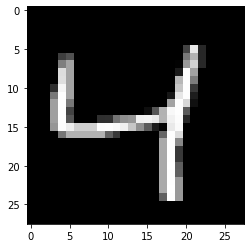

In [73]:
plt.imshow(x[2].reshape(28,28),cmap='gray')
plt.show()

In [74]:
np.unique(y,return_counts=True)

(array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype=object),
 array([6903, 7877, 6990, 7141, 6824, 6313, 6876, 7293, 6825, 6958]))

## use minmax scalar here for feature scaling

In [75]:
from sklearn.preprocessing import MinMaxScaler 

In [76]:
minmax_scaler = MinMaxScaler() # initialization of minmaxScalar

## Splitting data

In [77]:
from sklearn.model_selection import train_test_split

In [78]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=.2,random_state=12)

## Transforming data using Feature Scaling (MinMaxScaler) OR Normalizing data using MinMax Scalar. It is very important to normalize data in the dataframe before feeding it to SVM

In [79]:
minmax_scaler_train = minmax_scaler.fit_transform(xtrain)
minmax_scaler_test = minmax_scaler.transform(xtest)

## Now applying SVM

In [80]:
from sklearn.svm import SVC

In [81]:
#gamma=.01,10
clf = SVC(kernel='rbf',gamma=0.001)  #model assumes that data is non-linear separable
#clf = SVC(kernel='linear')   #model assumes that data is linear separable

In [82]:
clf.fit(minmax_scaler_train,ytrain) # training SVC model

SVC(gamma=0.001)

In [83]:
score = clf.score(minmax_scaler_test,ytest)
score

0.9367142857142857

In [84]:
pred = clf.predict(minmax_scaler_test)
pred

array(['3', '7', '1', ..., '5', '7', '4'], dtype=object)

In [85]:
np.where(pred!=ytest) #getting all the missclassified numbers 

(array([    5,     8,     9,    15,    39,    44,    49,    54,    56,
           90,   117,   125,   130,   137,   150,   187,   190,   212,
          213,   225,   281,   334,   336,   345,   355,   362,   367,
          416,   417,   428,   465,   468,   471,   472,   489,   499,
          523,   537,   557,   601,   614,   630,   633,   648,   688,
          718,   719,   725,   752,   764,   768,   782,   793,   802,
          842,   853,   874,   917,   958,   995,  1011,  1015,  1022,
         1086,  1120,  1126,  1130,  1134,  1141,  1158,  1186,  1219,
         1237,  1251,  1253,  1259,  1283,  1288,  1296,  1338,  1340,
         1360,  1408,  1417,  1427,  1443,  1461,  1488,  1507,  1509,
         1520,  1545,  1584,  1599,  1608,  1610,  1645,  1678,  1682,
         1690,  1711,  1714,  1743,  1769,  1772,  1793,  1796,  1798,
         1802,  1848,  1857,  1881,  1891,  1899,  1901,  1902,  1904,
         1932,  1991,  2025,  2040,  2047,  2093,  2100,  2115,  2130,
      

## save the model to disk

In [86]:
#pickle.dump(model_name, open(filename, 'wb')) ->wb = write binary

In [87]:
import pickle

In [89]:
filename = 'digit_recognizer_svm.sav'
pickle.dump(clf, open(filename, 'wb'))

## Read the saved model from the disk

In [90]:
# load the model from disk
filename = 'digit_recognizer_svm.sav'
loaded_model = pickle.load(open(filename, 'rb')) # -> rb = read binary
result = loaded_model.score(minmax_scaler_test,ytest)

In [91]:
result

0.9367142857142857

In [92]:
loaded_model.predict(minmax_scaler_test)

array(['3', '7', '1', ..., '5', '7', '4'], dtype=object)

In [93]:
ytest

['3', '7', '1', '9', '1', ..., '6', '1', '5', '7', '2']
Length: 14000
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

## Importing image in this jupyter notebook using OpenCv

In [94]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

## When you use opencv to import an image the image is plready in numpy nD array format and is ready to be used

In [95]:
# importing image
image = cv2.imread('/home/Machine_learning/github/Machine_Learning/Prutor_ML_ClassWork/six.png')

In [96]:
image.ndim #here image imported via opencv is in 3D numpy array  

3

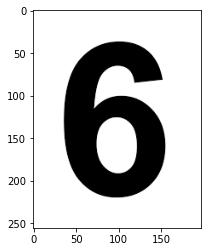

In [97]:
plt.imshow(image)

## Because we trained our model using numbers of color white with a black background we need to invert the color of our image

In [98]:
image1 = np.invert(image) #inverting color using numpy

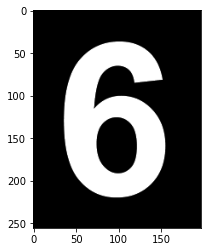

In [99]:
plt.imshow(image1)

## converting image into a gray scale image

In [100]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [101]:
gray.ndim #it will convert 3D array of image into 2D array of image 

2

## We trained our model using 28 x 28 size images so we need to resize our imported image in 28 x 28 size

In [102]:
resized_img = cv2.resize(gray,(28,28)) #resize image into 28 x 28

In [103]:
resized_img.shape

(28, 28)

## Feature scaling using Minmax Scalar

### our pickeled model only accepts 784 features so we need to reshape our image_array into (1,784) shape

In [104]:
reshaped_image = resized_img.reshape(1,784) 

In [105]:
minmax_scaler_image = minmax_scaler.transform(reshaped_image) #feature scaling using minmaxscalar

In [106]:
# load the model from disk
filename = 'digit_recognizer_svm.sav'
loaded_model = pickle.load(open(filename, 'rb')) # -> rb = read binary

In [107]:
loaded_model.predict(minmax_scaler_image)

array(['2'], dtype=object)

## This model also did not recognized the number in this image correctly